# Laboratorio: Convolutional Neural Networks

En este laboratorio, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar imágenes de personajes de la conocida serie de los Simpsons.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://i.imgur.com/i8zIGqX.jpg" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en imágenes de personajes de los Simpsons extraídas directamente de capítulos de la serie. Este dataset ha sido recopilado por [Alexandre Attia](http://www.alexattia.fr/) y es más complejo que el dataset de Fashion MNIST que hemos utilizado hasta ahora. Aparte de tener más clases (vamos a utilizar los 18 personajes con más imágenes), los personajes pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros personajes en pantalla (si bien el personaje a clasificar siempre aparece en la posición predominante).

El dataset de training puede ser descargado desde aquí:

[Training data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60) (~500MB)

Por otro lado, el dataset de test puede ser descargado de aquí:

[Test data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8) (~10MB)

Antes de empezar la práctica, se recomienda descargar las imágenes y echarlas un vistazo.


## Carga de los datos

In [1]:
import cv2
import os
import numpy as np 
import keras
import matplotlib.pyplot as plt
import glob


# Primero, bajamos los datos de entrenamiento
keras.utils.get_file(fname="simpsons_train.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60")

# Descomprimimos el archivo
!tar -xzf /root/.keras/datasets/simpsons_train.tar.gz -C /root/.keras/datasets

# Hacemos lo mismo con los datos de test
keras.utils.get_file(fname="simpsons_test.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8")
!tar -xzf /root/.keras/datasets/simpsons_test.tar.gz -C /root/.keras/datasets

Using TensorFlow backend.


In [0]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [0]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.
    
    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas
     
    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [0]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)


In [5]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
DATASET_TRAIN_PATH_COLAB = "/root/.keras/datasets/simpsons"
DATASET_TEST_PATH_COLAB = "/root/.keras/datasets/simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [6]:
# Vamos a barajar aleatoriamente los datos. Esto es importante ya que si no
# lo hacemos y, por ejemplo, cogemos el 20% de los datos finales como validation
# set, estaremos utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]
print(perm)

[ 3948  9138  2210 ... 15290 16013 16823]


## Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas: 
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que nuestro modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting. Una posible partición puede ser 80 / 20.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como hemos hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

## Librerias utilies

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

## Preprocesado

In [0]:
def namestr(obj, namespace):
    mstr = [name for name in namespace if namespace[name] is obj][0]
    return mstr

def printshapes(data):
    mstr = namestr(data, globals())
    print(str(mstr) + ' shape = \t',data.shape)

In [9]:
# Preprocesado

# variables
xtest = X_t
ytest = y_t

#Escalado
x = X / 255.0
xtest = X_t / 255.0

# number of clases
N = len(np.unique(y)) 
print('NUmero de clases = ',N)

# dividimos train en train/val
perc = 0.2
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=perc)

# convertimos las salida a one hot
ytrain = keras.utils.to_categorical(ytrain,N)
yval = keras.utils.to_categorical(yval,N)
ytest = keras.utils.to_categorical(ytest,N)

### ____________________________________________
###  Reshape (solo para Fully Connected)

# actualizamos dimensiones
N1,X1,Y1,C1 =  xtrain.shape
N2,X2,Y2,C2 =  xval.shape
N3,X3,Y3,C3 =  xtest.shape

#hacemos reshape de la entrada
xtrain_grey = np.dot(xtrain[...,:3], [0.2989, 0.5870, 0.1140])
xval_grey = np.dot(xval[...,:3], [0.2989, 0.5870, 0.1140])
xtest_grey = np.dot(xtest[...,:3], [0.2989, 0.5870, 0.1140])

xtrainfc  = xtrain_grey.reshape(N1,X1*Y1)
xvalfc    = xval_grey.reshape(N2,X2*Y2)
xtestfc   = xtest_grey.reshape(N3,X3*Y3)

ytrainfc  = ytrain
yvalfc    = yval
ytestfc   = ytest

### ____________________________________________


# Shapes2
vsh = [xtrain,xval,ytrain,yval,xtest,ytest]

for i in vsh:
  printshapes(i)

NUmero de clases =  18
xtrain shape = 	 (15193, 64, 64, 3)
xval shape = 	 (3799, 64, 64, 3)
ytrain shape = 	 (15193, 18)
yval shape = 	 (3799, 18)
xtest shape = 	 (890, 64, 64, 3)
ytest shape = 	 (890, 18)


In [10]:
xtrainfc.shape

(15193, 4096)

## Sintesis

In [11]:
# definimos los parametros del modelo, datos
inputdim_fc = xtrainfc.shape[1]
print('Input Dim FC = ', inputdim_fc)

inputdim_cnn = xtrain.shape[1:]
print('Input Dim CNN = ', inputdim_cnn)



Input Dim FC =  4096
Input Dim CNN =  (64, 64, 3)


### Modelo 1 -- CNN (I) 
3 CNN + 2 Dense (Kernel 3)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0        

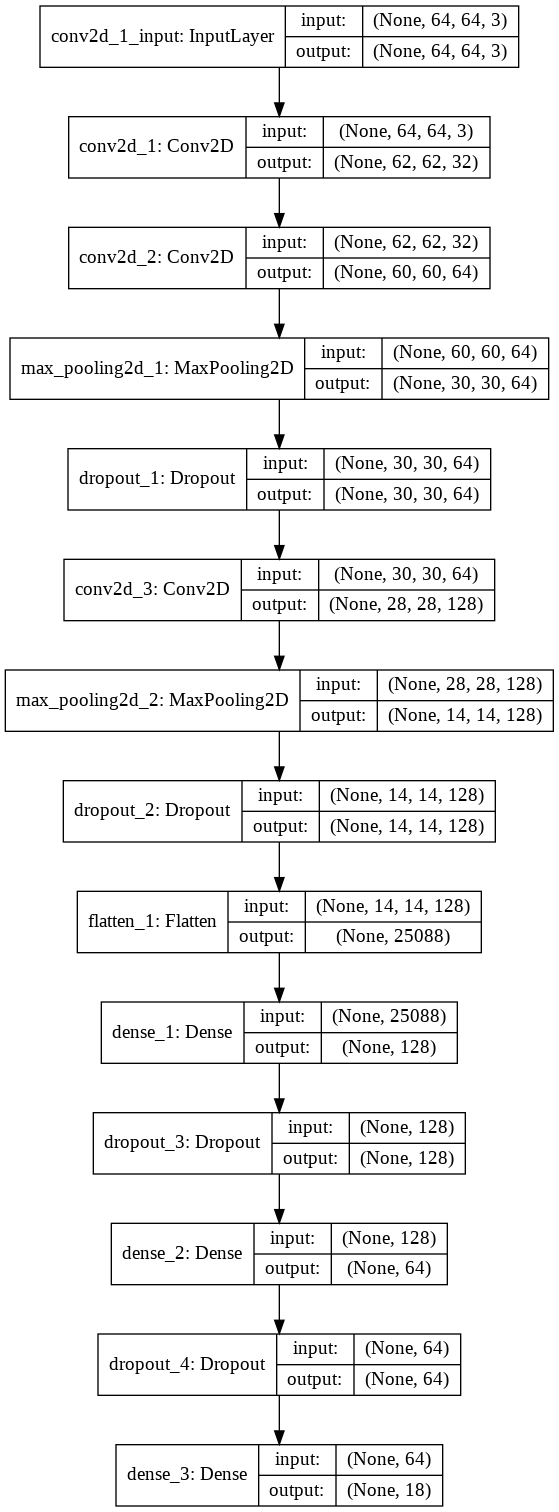

In [12]:
# Modelo 1

#layers
f1 = 32
f2 = 64
f3 = 128

l1 = 128
l2 = 64

#batch
mepochs = 30
mbatch = 32

# kernel 
k = 3

#activation
act = 'relu'

# pooling
p=2
ps = (p,p)

# dropout
drop = 0.2

## CNN

model1 = Sequential()
model1.add(Conv2D(f1, kernel_size=(k,k),activation=act,input_shape=inputdim_cnn))

model1.add(Conv2D(f2, kernel_size=(k,k),activation=act))
model1.add(MaxPooling2D(pool_size=ps))
model1.add(Dropout(drop))

model1.add(Conv2D(f3, kernel_size=(k,k),activation=act))
model1.add(MaxPooling2D(pool_size=ps))
model1.add(Dropout(drop))

# DENSE
model1.add(Flatten()) #coge el volumen -> vector

model1.add(Dense(l1,activation = act))
model1.add(Dropout(drop))

model1.add(Dense(l2,activation = act))
model1.add(Dropout(drop))

model1.add(Dense(N,activation = 'softmax'))

 # compilamos el modelo
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


# Summary
model1.summary()

i = str(1) #numero de model1o
plot_model(model1, show_shapes = 'True', to_file='model1'+i+'.png')

### Modelo 2 -- CNN (II)
3 CNN + 2 Dense (Kernel 5/3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)      

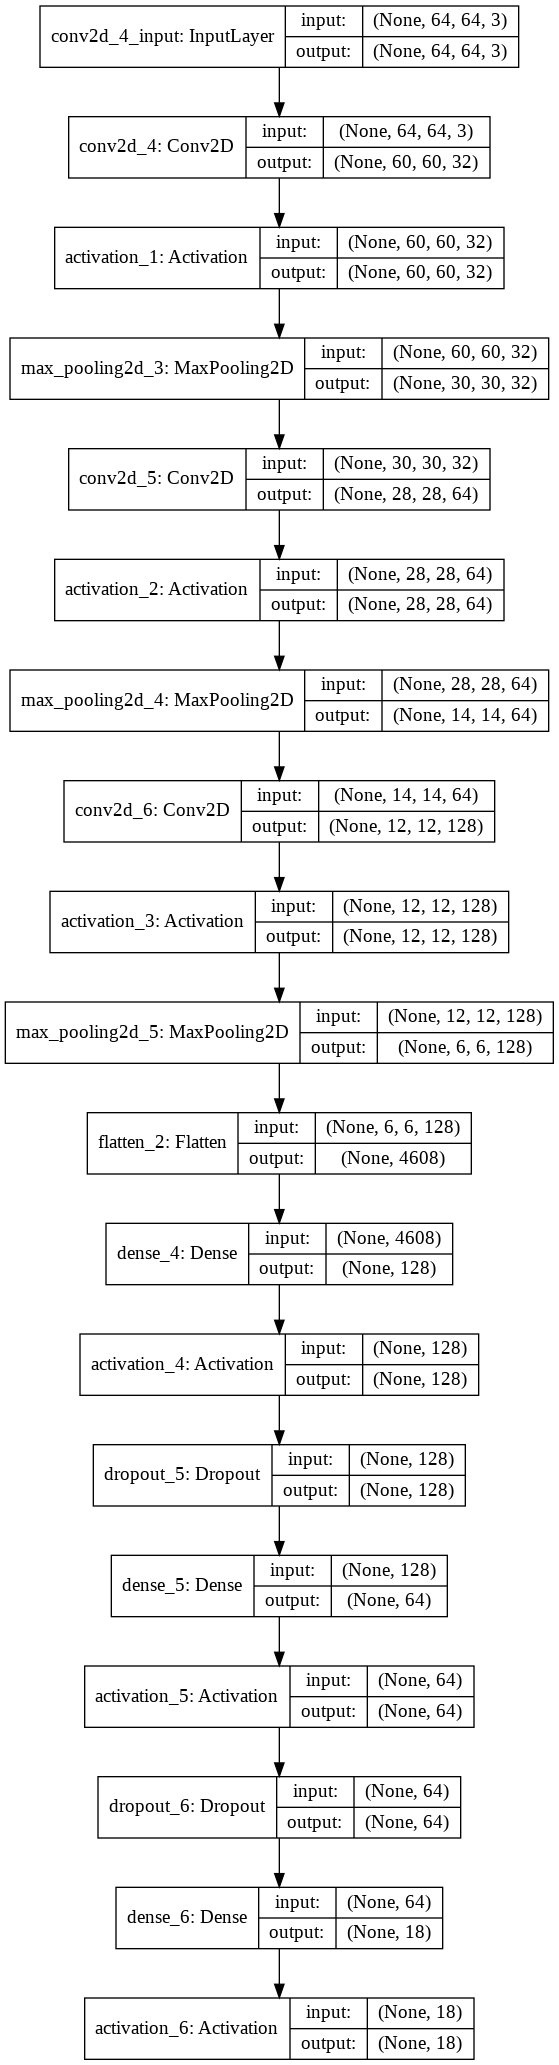

In [13]:
# model2o 2
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), input_shape=inputdim_cnn))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(N))
model2.add(Activation('softmax'))

# compilamos el modelo
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model2.summary()

i = str(2) #numero de model2o
plot_model(model2, show_shapes = 'True', to_file='model2'+i+'.png')

### Modelo 3 -- VGG 19

In [14]:
model3 = keras.applications.vgg19.VGG19(include_top=True, 
                                        weights=None,
                                        input_tensor=None, 
                                        input_shape=inputdim_cnn, 
                                        pooling=None, 
                                        classes=N)
 # compilamos el modelo
model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model3.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

### Modelo 4 - Data Augmentation
(construimos solo los datos y al compilar cambiamos el name del modelo)

In [15]:
# ampliamos los datos
train_datagen = ImageDataGenerator(horizontal_flip=True)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(xtrain, ytrain)
validation_generator = test_datagen.flow(xval, yval) 

model4 = Sequential()
model4.add(Conv2D(f1, kernel_size=(k,k),activation=act,input_shape=inputdim_cnn))

model4.add(Conv2D(f2, kernel_size=(k,k),activation=act))
model4.add(MaxPooling2D(pool_size=ps))
model4.add(Dropout(drop))

model4.add(Conv2D(f3, kernel_size=(k,k),activation=act))
model4.add(MaxPooling2D(pool_size=ps))
model4.add(Dropout(drop))

# DENSE
model4.add(Flatten()) #coge el volumen -> vector

model4.add(Dense(l1,activation = act))
model4.add(Dropout(drop))

model4.add(Dense(l2,activation = act))
model4.add(Dropout(drop))

model4.add(Dense(N,activation = 'softmax'))

 # compilamos el model4o
model4.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Summary
model4.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 128)      

### Modelo 5 - VGG 19  (II) + DA
modificando FC Layers 
Data augmentation

In [16]:
model_base= keras.applications.vgg19.VGG19(include_top=False, 
                                        weights='imagenet',
                                        input_tensor=None, 
                                        input_shape=inputdim_cnn, 
                                        pooling=None, 
                                        classes=N)

model_base.summary()
print('\n')


x = model_base.output
x = Flatten()(x)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x) 
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = Dense(64, activation='relu')(x) 
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = Dense(N, activation='softmax')(x) 

model5 = Model(inputs=model_base.input, outputs=x)

 # compilamos el modelo
model5.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model5.summary()








Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       

###Modelo 6 - Fully Conected 

In [17]:
### ------------------- Eleccion de parametros --------------------
#* Número de capas y neuronas por capa
nlayer1 = 512
nlayer2 = 256
nlayer3 = 25

mepochs = 30

#* Optimizadores y sus parámetros
mlr = 0.02
opt = 'Adagrad'
#* Batch size
mbatch = 100
print('vol =',mepochs*mbatch)

#* Unidades de activación
act = 'relu'
#act = keras.layers.LeakyReLU(alpha=0.1)


#* Uso de capas dropout, regularización L2, regularización L1...
# --> Incluido en la creacion del modelo
mdrop = 0.1

#* Early stopping 
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_acc', mode='auto', verbose=1) #callback

#* Batch normalization
# --> Incluido en la creacion del modelo
# -----------------------------------------------------------------


# -------------------  creamos el modelo 8 -----------------------
model6 = Sequential()

model6.add(Dense(nlayer1,input_dim=inputdim_fc,activation = act))
model6.add(keras.layers.BatchNormalization())
model6.add(Dropout(mdrop))

model6.add(Dense(nlayer2,activation = act))
model6.add(keras.layers.BatchNormalization())
model6.add(Dropout(mdrop))

model6.add(Dense(nlayer3, activation = act))
model6.add(keras.layers.BatchNormalization())
model6.add(Dropout(mdrop))

model6.add(Dense(N, activation='softmax'))

# compilamos el modelo
model6.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

# resumen y grafico del modelo
model6.summary()

vol = 3000
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               2097664   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 25)    

## Train

In [0]:
#----------------------------------------------------------------------------
def alb_train(model,xtrain,ytrain,mbatch,mepochs,xval,yval):
  # Early stopping 
  from keras.callbacks import ModelCheckpoint, EarlyStopping
  es = EarlyStopping(monitor='val_acc', mode='auto',  patience=4, verbose=1) #callback

  # entrenamos
  history = model.fit(xtrain, ytrain,
                    batch_size=mbatch,
                    epochs=mepochs,
                    verbose=2,
                    validation_data=(xval,yval),
                    callbacks=[es])
  return history

#----------------------------------------------------------------------------
def alb_train_Data_Aug(model,train_generator,validation_generator,mbatch,mepochs):
  # Early stopping 
  from keras.callbacks import ModelCheckpoint, EarlyStopping
  es = EarlyStopping(monitor='val_acc', mode='auto', patience=4, verbose=1) #callback

   # steps_per_epoch=len(xtrain) // mbatch,
  history = model.fit_generator(train_generator,
                      verbose = 2,
                      epochs=mepochs,
                      validation_data=validation_generator,
                      callbacks=[es])
  
  return history

In [19]:
print('\nModel 1 -------------')
history1 = alb_train(model1,xtrain,ytrain,mbatch,mepochs,xval,yval)
print('\nModel 2 -------------')
history2 = alb_train(model2,xtrain,ytrain,mbatch,mepochs,xval,yval)
print('\nModel 3 -------------')
history3 = alb_train(model3,xtrain,ytrain,mbatch,mepochs,xval,yval)
print('\nModel 4 -------------')
history4 = alb_train_Data_Aug(model4,train_generator,validation_generator,mbatch,mepochs)
print('\nModel 5 -------------')
history5 = alb_train(model5,xtrain,ytrain,mbatch,mepochs,xval,yval)
print('\nModel 6 -------------')
history6 = alb_train(model6,xtrainfc,ytrainfc,mbatch,mepochs,xvalfc,yvalfc)


Model 1 -------------
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15193 samples, validate on 3799 samples
Epoch 1/30
 - 7s - loss: 2.5333 - acc: 0.2043 - val_loss: 2.0482 - val_acc: 0.3698
Epoch 2/30
 - 4s - loss: 1.9052 - acc: 0.4212 - val_loss: 1.5303 - val_acc: 0.5609
Epoch 3/30
 - 4s - loss: 1.4426 - acc: 0.5688 - val_loss: 1.1779 - val_acc: 0.6410
Epoch 4/30
 - 4s - loss: 1.1505 - acc: 0.6520 - val_loss: 1.0179 - val_acc: 0.6936
Epoch 5/30
 - 4s - loss: 0.9228 - acc: 0.7175 - val_loss: 0.8706 - val_acc: 0.7376
Epoch 6/30
 - 4s - loss: 0.7626 - acc: 0.7622 - val_loss: 0.7735 - val_acc: 0.7665
Epoch 7/30
 - 4s - loss: 0.6423 - acc: 0.8000 - val_loss: 0.7746 - val_acc: 0.7736
Epoch 8/30
 - 4s - loss: 0.5434 - acc: 0.8270 - val_loss: 0.7388 - val_acc: 0.7886
Epoch 9/30
 - 4s - loss: 0.4650 - acc: 0.8538 - val_loss: 0.7594 - val_acc: 0.7936
Epoch 10/30
 - 4s - loss: 0.4032 - acc: 0.8721 - val_loss: 0.7326 - val_acc: 0.7984
E

## Resultados

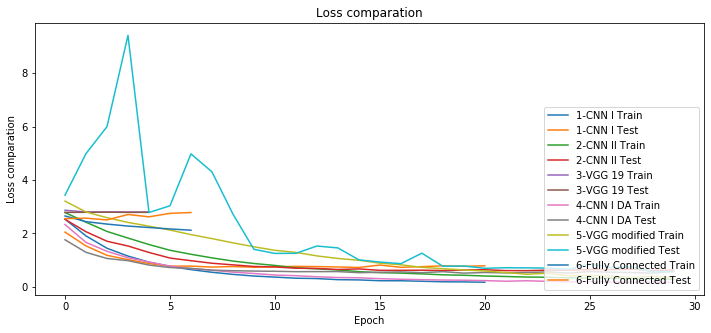

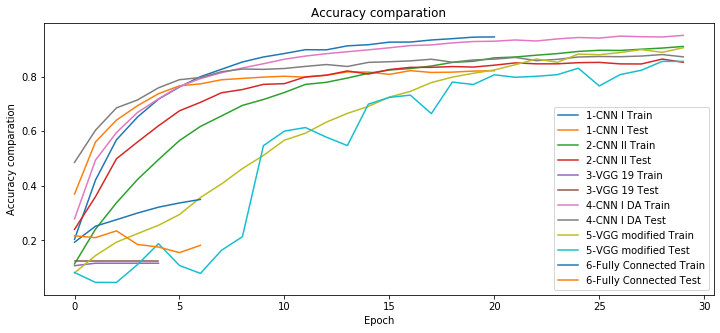

In [20]:
def plot_compare_alb(vhistory, vname, metric_train, metric_val, title="Graph title"):
  plt.figure(figsize=(12,5))
  for i in range (len(vhistory)): 

    plt.plot(vhistory[i].history[metric_train],label='%s Train' % vname[i])

    plt.plot(vhistory[i].history[metric_val],label='%s Test' % vname[i])
  #plt.figure(figsize=(4,5))
  #plt.rcParams["figure.figsize"] = [10,10]
  plt.title(title)
  plt.ylabel(title)
  plt.xlabel('Epoch')
  plt.legend(loc='lower right')
  plt.show()

def plot_compare_alb_loss_acc(vhistory, vname):
  plot_compare_alb(vhistory, vname, 'loss','val_loss', title="Loss comparation")
  plot_compare_alb(vhistory, vname,'acc', 'val_acc', title="Accuracy comparation")




#graphs
vhistory = [history1,history2,history3,history4,history5,history6]
vname = ['1-CNN I','2-CNN II','3-VGG 19','4-CNN I DA','5-VGG modified','6-Fully Connected']

plot_compare_alb_loss_acc(vhistory, vname)

# Tras analizar varios modelos hemos llegado a las siguientes conclusiones : 

* El tiempo de entrenamiento es un factor a tener en cuenta, debido a un early stopping que habiamos introducido no nos hemos podido dar cuenta de la precision final de cada modelo. Sin embargo si lo que nos interesa es tener un modelo lo mas rapido posible y con buenos resultados CNN-I destaca respecto al resto ya que en 8 epochs tenemos un modelo con precision del 85%. Modelos mas complejos como VGG19 ha tardado mas en obtener buenos resultados pero ha acabo por superar a los modelos personales dedicandole tiempo de entrenamiento y ajuste.   

* El modelo fully conected (modelo6) no ofrece muy buenos resultados. 

*   Los modelos de CNN son mas precisos que un FCL para este tipo de problemas en los que hay mucha variacion de la imagen objetivo.  

*   Al introducir Data Augmentation hemos disminuido levenmente la precision del modelo, pero tenemos bastante menos overfiting, la validacion y entrenamiento convergen, lo que significa que el modelo ha aprendido. 

* El modelo preentrenado no resulta para nada eficaz para este dataset en concreto. 

* Utilizando transfer learning (modelo5) hemos podido mejorar la precision pero hace falta mucho mas tuning de parametros para lograr precisiones similares a las logradas con los modelos 1 y 2. 

* El mejor modelo es el modelo 1 y cuando lo aplicamos con Data Augmentation.





## Test Images

Model 1 : 
Test loss =  0.13145169507753984
Test accuracy =  0.9685393251729815

Model 2 : 
Test loss =  0.20055343756514987
Test accuracy =  0.947191011369898

Model 3 : 
Test loss =  2.979243161705103
Test accuracy =  0.05617977538135614

Model 4 : 
Test loss =  0.15734580542599216
Test accuracy =  0.9629213484485498

Model 5 : 
Test loss =  0.42009740304411125
Test accuracy =  0.8629213477788347

Model 6 : 
Test loss =  2.7031880009040403
Test accuracy =  0.1887640450275346



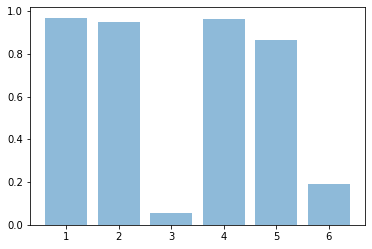

In [21]:
models = [model1,model2,model3,model4,model5,model6]
a = 0
x = list()
y = list()

for i in models: 
  a += 1
  if (a>5):
    score = i.evaluate(xtestfc,ytestfc,verbose=0)
  else:
    score = i.evaluate(xtest,ytest,verbose=0)
  print('Model {} : '.format(a))
  print('Test loss = ',score[0])
  print('Test accuracy = ', score[1])
  x.append(a)
  y.append(score[1])
  print()

# grafica
plt.bar(np.arange(len(y)),y, align='center', alpha=0.5)
plt.xticks(np.arange(len(y)), x);
plt.show()


El modelo 4 - CNN ajustada propia con data augmentation es la que ofrece mejores resultados y tiene menos overfiting.  

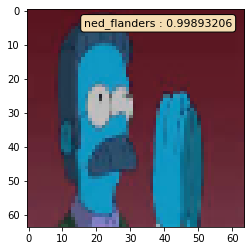

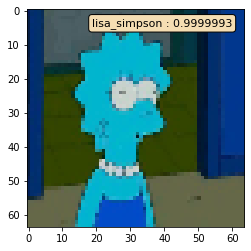

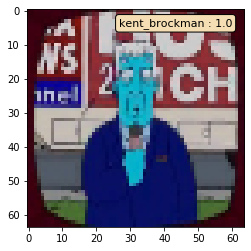

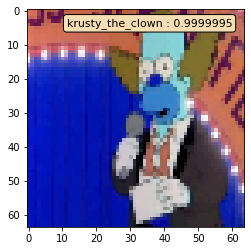

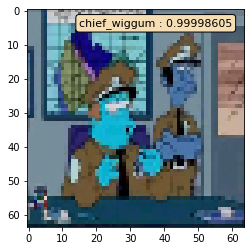

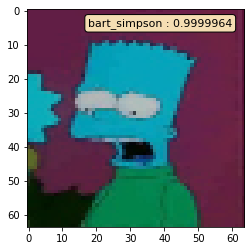

In [22]:

def visualize_example(x,s):
    plt.figure()
    plt.imshow(x)
    #plt.colorbar()
    plt.grid(False)
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    plt.text(60, 2, s, size=11, rotation=0,ha="right", va="top",bbox=dict(props))
    plt.show()


mlist = np.random.randint(0, len(xtest), size=6) 
                     
for num in mlist:
  # hacemos una prediccion
  mypred = model4.predict(np.array([xtest[num]]))
  nclass = np.argmax(mypred)
  pred =  list(MAP_CHARACTERS.values())[nclass] #prediccion
  #print('Class == ',str(pred))

  s = str(pred)+' : ' + str(np.max(mypred))
  # dibujamos
  visualize_example(xtest[num],s)

Vemos como con el modelo4 obtenemos muy buenas precisiones en el test. 

# Conclusiones finales

Este dataset, al ser mas complejo que el fashion MNIST ha sido mas difícil entrenarlo. Sin embargo, hemos obtenido al final muy buenos resultados. Las conclusiones generales del lqborqtiorio son los siguientes: 

*	Hay muchas posibilidades a la hora de elegir un modelo de CNN. En cuanto a dimensiones, generalmente los modelos en los que hemos introducido varias capas convolutivas de cada vez menor tamaño (en torno a la mitad a cada paso) han dado buenos resultados.

*	Los modelos CNN en promedio convergen más rápido que los Fully Connected y utilizan bastante menos parámetros. 

*	Utilizar Data Augmentation ha reducido considerablemente el overfiting. 

*	El tiempo disponible para realizar nuestro entrenamiento es otro factor a tener en cuenta y hasta ahora no lo habíamos considerado. Podemos obtener una buena precisión también con una fully conected layer, pero nos ha llevado el doble de tiempo entre ajuste y prueba relajando las condiciones de early stoping. 

*	Utilizar transfer learning es buena idea si queremos un modelo rápido con poca precisión o también si queremos hacer un buen modelo reajustando los parámetros por defecto. 




## Guardar en pdf

In [23]:
## Convert to PDF
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

!apt-get -q install texlive texlive-xetex texlive-latex-extra pandoc
!pip -q install pypandoc
!ls
!jupyter nbconvert --to PDF "Laboratorio 1_SCA_Isorna.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
 A2_PLN_Isorna.ipynb
 A2_SCA_Alberto_Isorna.ipynb
 alb2.jpg
 Alberto_Isorna_YOLOv3_On_Colab
 Alberto_Isorna_YOLOv3_On_Colab_V3.ipynb
 Alberto_Isorna_Yolov3_tensorflow_COCO.ipynb
 Alberto_Isorna_Yolov3_tensorflow.ipynb
'Copia de A2_SCA_Alberto_Isorna.ipynb'
'Copia de Te damos la bienvenida a Colaboratory'
'Copia de Te damos la bienvenida a Colaboratory (1)'
 laboratorio1_05_05_2019.ipynb
'Laboratorio 1.pdf'
'Laboratorio 1_SCA_Isorn